In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_breastCancer = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/Breast_Cancer.csv", sep=",")

# Tutkitaan sarakkeita otsikkotasolla mitä datasta löytyy.

In [3]:
df_breastCancer.columns.tolist()

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status;']

In [4]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive;
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive;
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive;
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive;
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive;


# Seuraavassa nähdään tarkemmin kuinka monta saraketta ja kuinka monta riviä data sisältää. Nähdään myös, että osa datasta on numeerista dataa ja osa on datatyypiltään object.

In [5]:
df_breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# Tarkistetaan vielä, että ei ole tyhjiä arvoja.

In [6]:
df_breastCancer.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status;                   0
dtype: int64

In [7]:
df_breastCancer['Status;'].value_counts()

Alive;    3398
Dead;      607
Alive       10
Dead         9
Name: Status;, dtype: int64

 # Yllä olevasta nähdään, että sarakkeessa 'Status' on kirjattu arvoja hieman eri tavoilla. Muutetaan nämä niin, että sarakkeiden arvoista poistetaan ylimääräiset kaksoispisteet.

In [8]:
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace('Alive;', 'Alive')
 
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace('Dead;', 'Dead')
 
df_breastCancer['Status;'].value_counts()

Alive    3408
Dead      616
Name: Status;, dtype: int64

In [9]:
df_breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

 # Tarkastellaan sarakkeita numeerisena datana.

In [10]:
df_breastCancer.describe().round(2)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.00,4024.00,4024.00,4024.00,4024.00
mean,53.97,30.47,14.36,4.16,71.30
std,8.96,21.12,8.10,5.11,22.92
min,30.00,1.00,1.00,1.00,1.00
25%,47.00,16.00,9.00,1.00,56.00
50%,54.00,25.00,14.00,2.00,73.00
75%,61.00,38.00,19.00,5.00,90.00
max,69.00,140.00,61.00,46.00,107.00


In [11]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [12]:
df_breastCancer

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Erotellaan datasta opetussetti ja testisetti. Opetusdataa varten irrotetaan alkuperäisestä datasta 80 % osajoukko. 

In [13]:
from sklearn.model_selection import train_test_split

df_train_full, df_test_full = train_test_split(df_breastCancer, test_size=0.2, random_state=33, stratify=df_breastCancer['Status;'])

# Jaetaan testidata evaluointi- ja unseen-setteihin (50:50). "Stratify"-parametri tekee jaon niin, että esimerkkidata jaetaan suhteessa saman arvon eri setteihin. 

In [14]:
df_test_eval, df_test_unseen = train_test_split(df_test_full, test_size=0.5, random_state=33, stratify=df_test_full['Status;'])
print(df_train_full.shape, df_test_full.shape)
print(df_test_eval.shape, df_test_unseen.shape)

(3219, 16) (805, 16)
(402, 16) (403, 16)


# Sovitetaan enkooderi opetusdatalla. Koska koneoppisen algoritmit ymmärtävät suurimmaksi osaksi numeerista dataa, niin muutetaan object-tyyppiset sarakkeet numeerisiksi. Käytetään OrdinalEncoderia, koska sen kanssa voidaan käyttää "encoded_missing_value", joka varmistaa ettei opetusdatan ulkopuolella esiinnhy ennennäkemätöntä dataa.

In [15]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(encoded_missing_value=-1)
cols_to_transform = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status;']

enc.fit(df_train_full[cols_to_transform])

OrdinalEncoder(encoded_missing_value=-1)

# Tarkastellaan enkoodausta.

In [16]:
 for col, categories in zip(enc.get_feature_names_out(), enc.categories_):
    mapping = {col: {(val, i) for i, val in enumerate(categories)}}
    print(mapping)

{'Race': {('Black', 0), ('White', 2), ('Other', 1)}}
{'Marital Status': {('Single ', 3), ('Divorced', 0), ('Widowed', 4), ('Married', 1), ('Separated', 2)}}
{'T Stage ': {('T3', 2), ('T2', 1), ('T1', 0), ('T4', 3)}}
{'N Stage': {('N1', 0), ('N2', 1), ('N3', 2)}}
{'6th Stage': {('IIIB', 3), ('IIIC', 4), ('IIIA', 2), ('IIB', 1), ('IIA', 0)}}
{'differentiate': {('Poorly differentiated', 1), ('Moderately differentiated', 0), ('Well differentiated', 3), ('Undifferentiated', 2)}}
{'Grade': {(' anaplastic; Grade IV', 0), ('1', 1), ('3', 3), ('2', 2)}}
{'A Stage': {('Regional', 1), ('Distant', 0)}}
{'Estrogen Status': {('Negative', 0), ('Positive', 1)}}
{'Progesterone Status': {('Negative', 0), ('Positive', 1)}}
{'Status;': {('Dead', 1), ('Alive', 0)}}


# Nyt sarakkeessa 'Status' arvo 0 tarkoittaa, että henkilö on elossa tarkkailuajan aikana ja arvo 1 tarkoittaa, että henkilö on kuollut tarkkailuajan kuluessa. 

# Käydään asettamassa enkoodatut muuttujat uusine arvioineen paikalleen opetusdataan. 

In [17]:
train_full_cols_transformed = enc.transform(df_train_full[cols_to_transform])
for i, col in enumerate(enc.get_feature_names_out()):
    df_train_full[col] = train_full_cols_transformed[:, i]

# Käydään asettamassa enkoodatut muuttujat uusine arvioineen paikalleen evaluointidataan.

In [18]:
test_eval_cols_transformed = enc.transform(df_test_eval[cols_to_transform])
for i, col in enumerate(enc.get_feature_names_out()):
    df_test_eval[col] = test_eval_cols_transformed[:, i]

 # Käydään asettamassa enkoodatut muuttujat uusine arvioineen paikalleen (unseen-data).

In [19]:
test_unseen_cols_transformed = enc.transform(df_test_unseen[cols_to_transform])
for i, col in enumerate(enc.get_feature_names_out()):
    df_test_unseen[col] = test_unseen_cols_transformed[:, i]

 # Otetaan mallinnukseen muuttujat df_trainista eli opetusdatasta.

In [20]:
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=33, stratify=df_train_full['Status;'])

In [21]:
X_train = df_train.iloc[:,0:15].to_numpy()
y_train = df_train.iloc[:,15].to_numpy()
    
X_val = df_val.iloc[:,0:15].to_numpy()
y_val = df_val.iloc[:,15].to_numpy()

In [22]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2575, 15) (2575,)
(644, 15) (644,)


#Ylläolevasta nähdään, että opetusdataa on 2575 riviä ja siellä on 15 muuttujaa. Lisäksi vastauksia (y_train) on 644.


In [23]:
print(df_train.iloc[:,0:15].columns)
print(df_train.iloc[:,15:].columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')
Index(['Status;'], dtype='object')


In [24]:
#"Seuraavaksi tehdään mallinnusta. Otetaan sitä varten ensiksi kirjastoja käyttöön."

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
  
model = Sequential()
model.add(Dense(60, input_dim=15, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                960       
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,111
Trainable params: 3,111
Non-trainable params: 0
_________________________________________________________________


In [26]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [27]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8)

Epoch 1/50
322/322 [==============================] - 2s 5ms/step - loss: 0.3687 - accuracy: 0.8730 - val_loss: 0.3513 - val_accuracy: 0.8835
Epoch 2/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3029 - accuracy: 0.8862 - val_loss: 0.3087 - val_accuracy: 0.8820
Epoch 3/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3002 - accuracy: 0.8882 - val_loss: 0.3060 - val_accuracy: 0.8866
Epoch 4/50
322/322 [==============================] - 1s 4ms/step - loss: 0.2949 - accuracy: 0.8870 - val_loss: 0.2938 - val_accuracy: 0.8913
Epoch 5/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8878 - val_loss: 0.2970 - val_accuracy: 0.8913
Epoch 6/50
322/322 [==============================] - 1s 5ms/step - loss: 0.2902 - accuracy: 0.8948 - val_loss: 0.2968 - val_accuracy: 0.8851
Epoch 7/50
322/322 [==============================] - 1s 5ms/step - loss: 0.2887 - accuracy: 0.8889 - val_loss: 0.3009 - val_accuracy: 0.8913
Epoch 

In [28]:
X_test_eval = df_test_eval.iloc[:,0:15].to_numpy()
y_test_eval = df_test_eval.iloc[:,15].to_numpy()
  
_, accuracy = model.evaluate(X_test_eval, y_test_eval)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9055
Accuracy: 90.55


In [29]:
preds = model.predict(X_test_eval)
print(preds.shape)

preds[:5]

(402, 1)


array([[0.00953774],
       [0.00673565],
       [0.02778854],
       [0.3406252 ],
       [0.14207503]], dtype=float32)

# Seuraavasta nähdään todennäköisyydet kullekin havainolle. Jos arvo on enemmän kuin 0.5, niin silloin ennustamisessa oltaisiin varmoja siitä, että syöpään sairastunut on kuollut.

In [30]:
preds_labels = (preds[:, 0]> 0.5).astype(int)
   
preds_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Mallin tarkkuuden laskeminen

In [31]:
acc = np.count_nonzero(preds_labels == y_test_eval) / len(y_test_eval)
   
print(f"Accuracy with unseen {len(y_test_eval)} samples: {acc*100:.3f}")

Accuracy with unseen 402 samples: 90.547


# Tästä siis nähdään, että tarkkuus on samaa suuruusluokkaa kuin opetusdatassa.

In [32]:

    #"Etsitään korrelaatiota 'Statuksen' suhteen. Arvot voivat olla välillä pienimmillään -1 ja suurimmillaan 1. Mitä lähempänä arvoa 1 ollaan, sen suurempi korrelaatio. Näissä tuloksissa ei näy vahvaa korrelaatiota minkään muun muuttujan kanssa."
 

<AxesSubplot:>

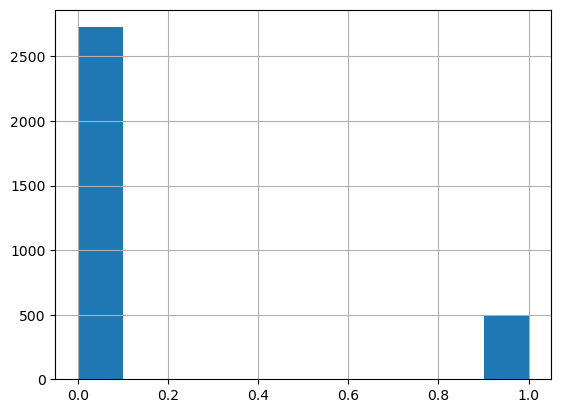

In [33]:
 df_train_full['Status;'].hist()

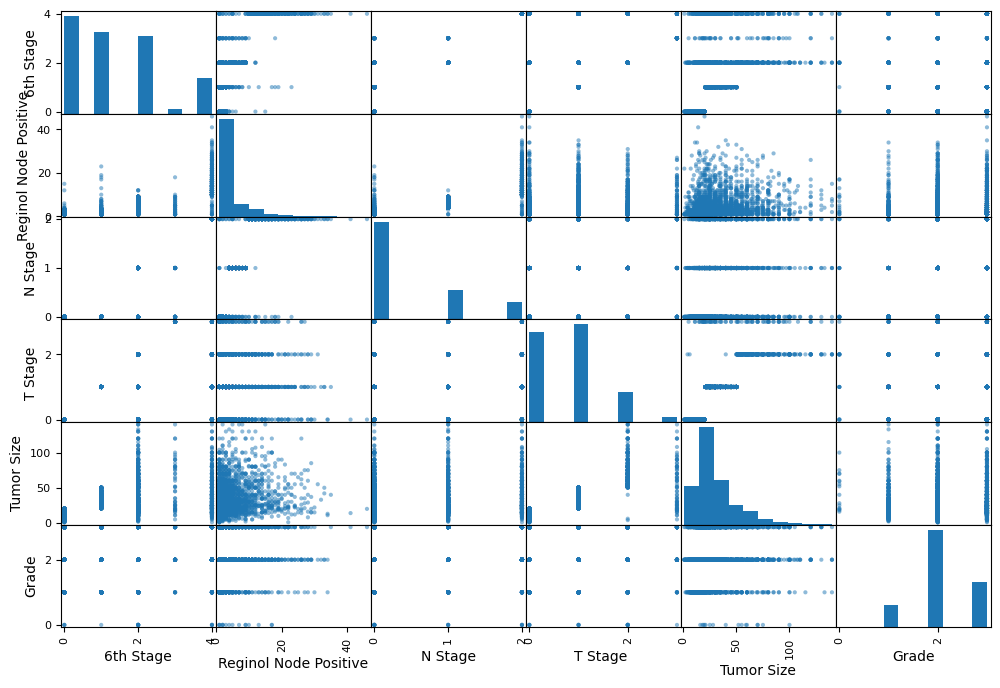

In [34]:
from pandas.plotting import scatter_matrix
   
attributes = ["6th Stage", "Reginol Node Positive", "N Stage", "T Stage ","Tumor Size","Grade"]
scatter_matrix(df_train_full[attributes], figsize=(12, 8));

# Eniten kuolleisuutta tuntuu vastaavan '6th Stage'
  
# Seuraavassa kuvassa katsotaan tarkemmin näiden korrelaatiota ja tämän perusteella nähdään, että korrelaatiota on, mutta ei kovin merkittävästi.

<AxesSubplot:xlabel='Status;', ylabel='6th Stage'>

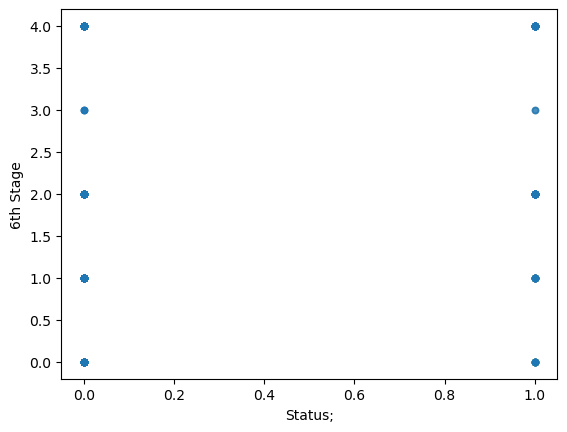

In [35]:
df_train.plot(kind="scatter", x="Status;", y="6th Stage", alpha=0.1)

# Seuraavassa vielä nähdään, että miten malli on ennustanut arvoa ja onko se mennyt oikein (True=1, False=0)

In [36]:
for i in range(10):
    print('%s => %s (expected %d)' % (X_test_eval[i].tolist(), preds_labels[i], y_test_eval[i]))

[53.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 13.0, 1.0, 1.0, 14.0, 1.0, 100.0] => 0 (expected 0)
[43.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 12.0, 1.0, 106.0] => 0 (expected 0)
[62.0, 2.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 15.0, 1.0, 1.0, 5.0, 1.0, 67.0] => 0 (expected 0)
[56.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 48.0, 1.0, 1.0, 3.0, 1.0, 41.0] => 0 (expected 0)
[46.0, 2.0, 1.0, 1.0, 2.0, 4.0, 1.0, 3.0, 1.0, 40.0, 0.0, 0.0, 12.0, 11.0, 71.0] => 0 (expected 0)
[66.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 80.0, 1.0, 1.0, 20.0, 1.0, 91.0] => 0 (expected 0)
[47.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 70.0, 1.0, 1.0, 32.0, 1.0, 102.0] => 0 (expected 0)
[51.0, 2.0, 3.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 25.0, 1.0, 1.0, 9.0, 1.0, 84.0] => 0 (expected 0)
[68.0, 0.0, 4.0, 1.0, 0.0, 1.0, 1.0, 3.0, 1.0, 45.0, 1.0, 1.0, 1.0, 1.0, 102.0] => 0 (expected 0)
[54.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 3.0, 1.0, 54.0, 1.0, 0.0, 13.0, 1.0, 50.0] => 0 (expected 0)


# Tallenetaan tarvittavat tiedostot muita käyttötarkoituksia varten.

In [47]:
df_train_full.to_csv("C:/Users/hetas/df_train_full.csv")

df_test_eval.to_csv("C:/Users/hetas/df_test_eval.csv")